<h1 align="center">📊🔍⚠️ Outlier detection in a dataset </h1>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import random
import morethemes as mt
mt.set_theme("ft")

In [2]:
# 100 random numbers with mean 25 and standard deviation 5
np.random.seed(42)
a = np.random.normal(loc=25, scale=5, size=100)
print(a)
print("Mean:", np.mean(a))

[27.48357077 24.30867849 28.23844269 32.61514928 23.82923313 23.82931522
 32.89606408 28.83717365 22.65262807 27.71280022 22.68291154 22.67135123
 26.20981136 15.43359878 16.37541084 22.18856235 19.9358444  26.57123666
 20.45987962 17.93848149 32.32824384 23.8711185  25.33764102 17.87625907
 22.27808638 25.55461295 19.24503211 26.87849009 21.99680655 23.54153125
 21.99146694 34.26139092 24.93251388 19.71144536 29.11272456 18.89578175
 26.04431798 15.20164938 18.35906976 25.98430618 28.6923329  25.85684141
 24.42175859 23.49448152 17.60739005 21.40077896 22.69680615 30.28561113
 26.71809145 16.18479922 26.62041985 23.0745886  21.61539    28.05838144
 30.15499761 29.6564006  20.80391238 23.45393812 26.65631716 29.87772564
 22.60412881 24.07170512 19.46832513 19.01896688 29.06262911 31.78120014
 24.63994939 30.01766449 26.80818013 21.77440123 26.80697803 32.69018283
 24.8208698  32.82321828 11.90127448 29.10951252 25.43523534 23.50496325
 25.45880388 15.06215543 23.90164056 26.78556286 32

{'whiskers': [<matplotlib.lines.Line2D at 0x2a67f0d4cd0>,
 'caps': [<matplotlib.lines.Line2D at 0x2a67f0d4f50>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a67f0b0b90>],
 'medians': [<matplotlib.lines.Line2D at 0x2a67f0d51d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a67f0d5310>],
 'means': []}

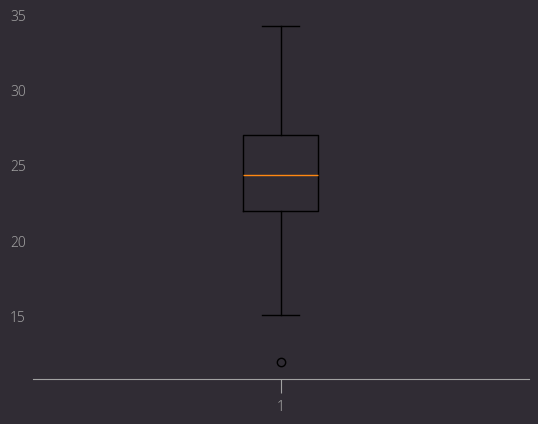

In [3]:
#data without outliers
plt.boxplot(a)

In [4]:
# add 4 extreme values to the a
data = np.append(a, [120, 130, 140,150]) 
data

array([ 27.48357077,  24.30867849,  28.23844269,  32.61514928,
        23.82923313,  23.82931522,  32.89606408,  28.83717365,
        22.65262807,  27.71280022,  22.68291154,  22.67135123,
        26.20981136,  15.43359878,  16.37541084,  22.18856235,
        19.9358444 ,  26.57123666,  20.45987962,  17.93848149,
        32.32824384,  23.8711185 ,  25.33764102,  17.87625907,
        22.27808638,  25.55461295,  19.24503211,  26.87849009,
        21.99680655,  23.54153125,  21.99146694,  34.26139092,
        24.93251388,  19.71144536,  29.11272456,  18.89578175,
        26.04431798,  15.20164938,  18.35906976,  25.98430618,
        28.6923329 ,  25.85684141,  24.42175859,  23.49448152,
        17.60739005,  21.40077896,  22.69680615,  30.28561113,
        26.71809145,  16.18479922,  26.62041985,  23.0745886 ,
        21.61539   ,  28.05838144,  30.15499761,  29.6564006 ,
        20.80391238,  23.45393812,  26.65631716,  29.87772564,
        22.60412881,  24.07170512,  19.46832513,  19.01

In [5]:
data.mean()

np.float64(28.731507127913012)

{'whiskers': [<matplotlib.lines.Line2D at 0x2a67f185a90>,
 'caps': [<matplotlib.lines.Line2D at 0x2a67f185d10>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a67f185950>],
 'medians': [<matplotlib.lines.Line2D at 0x2a67f185f90>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a67f1860d0>],
 'means': []}

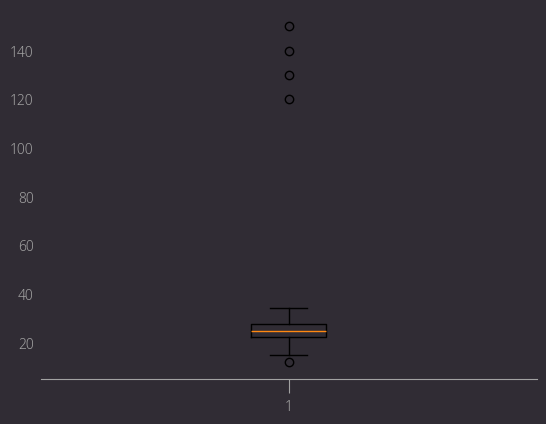

In [6]:
# boxplot
plt.boxplot(data)

In [7]:
#let's create a dataframe from the data
df = pd.DataFrame(data, columns=['Values'])

# calculate the first quartile and second quartile and the interquartile range
Q1 = df['Values'].quantile(0.25)
Q3 = df['Values'].quantile(0.75)
IQR = Q3 - Q1


- **the first quartile**

In [18]:
print(Q1)

22.140623402947845


- **show the second quartile**

In [19]:
print(Q3)

27.799195524498455


In [21]:
print("The interquartile value is ",IQR)

The interquartile value is  5.658572121550609


In [22]:
#detection of outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Values'] < lower_bound) | (df['Values'] > upper_bound)]

In [24]:
print(lower_bound)

13.652765220621932


In [25]:
print(upper_bound)

36.287053706824366


In [26]:
outliers

,Values
74,11.901274
100,120.000000
101,130.000000
102,140.000000
103,150.000000


In [27]:
#clear outliers
data_cleaned = df[(df['Values'] >= lower_bound) & (df['Values'] <= upper_bound)]

In [28]:
data_cleaned

,Values
0,27.483571
1,24.308678
2,28.238443
3,32.615149
4,23.829233
...,...
95,17.682425
96,26.480601
97,26.305276
98,25.025567


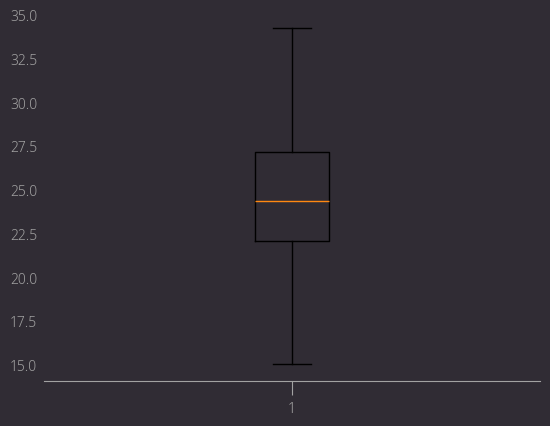

In [29]:
#boxplot without outliers
box = plt.boxplot(data_cleaned['Values'])